In [73]:
'''
-------------------------------------------------------------------------------
Filename   : heatmap.py
Date       : 2013-04-19
Author     : Joe Lotz
Description: My attempt at reproducing the FlowingData graphic in Python
Source     : http://flowingdata.com/2010/01/21/how-to-make-a-heatmap-a-quick-and-easy-solution/

Other Links:
    http://stackoverflow.com/questions/14391959/heatmap-in-matplotlib-with-pcolor
    
-------------------------------------------------------------------------------
'''

'\n-------------------------------------------------------------------------------\nFilename   : heatmap.py\nDate       : 2013-04-19\nAuthor     : Joe Lotz\nDescription: My attempt at reproducing the FlowingData graphic in Python\nSource     : http://flowingdata.com/2010/01/21/how-to-make-a-heatmap-a-quick-and-easy-solution/\n\nOther Links:\n    http://stackoverflow.com/questions/14391959/heatmap-in-matplotlib-with-pcolor\n    \n-------------------------------------------------------------------------------\n'

In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import numpy as np
%matplotlib inline
import os
URL_CSV = "http://datasets.flowingdata.com/ppg2008.csv"
f_name = 'ppg2008.csv'

In [75]:
def download_csv(url,fh):
    r = requests.get("http://datasets.flowingdata.com/ppg2008.csv",stream=True)
    if r.status_code == 200 :
    #     print(r.raw)
        with open(fh,'wb') as fd:
            fd.write(r.raw.data)
download_csv(URL_CSV,f_name)
print(os.path.getsize(f_name))

4992


In [76]:
def download_csv_iter(url,fh):
    r = requests.get("http://datasets.flowingdata.com/ppg2008.csv",stream=True)
    if r.status_code == 200 :
        with open(f_csv,'wb') as f:
            for chunk in r.iter_content(1024):
                f.write(chunk)
    del r
download_csv_iter(URL_CSV,f_name)
print(os.path.getsize(f_name))

4992


In [77]:
nba = pd.read_csv(f_name, index_col=0,engine = 'python')
# Normalize data columns
nba_norm = (nba - nba.mean()) / (nba.max() - nba.min())

In [78]:
# Sort data according to Points, lowest to highest
# This was just a design choice made by Yau
# inplace=False (default) ->thanks SO user d1337
nba_sort = nba_norm.sort_values('PTS', ascending=True)

nba_sort['PTS'].head(10)

Name  
Nate Robinson        -0.281692
Allen Iverson        -0.258615
Rashard Lewis        -0.243231
Chauncey Billups     -0.243231
Shaquille O'neal     -0.235538
Maurice Williams     -0.235538
Josh Howard          -0.220154
LaMarcus Aldridge    -0.212462
Ray Allen            -0.204769
Richard Hamilton     -0.197077
Name: PTS, dtype: float64

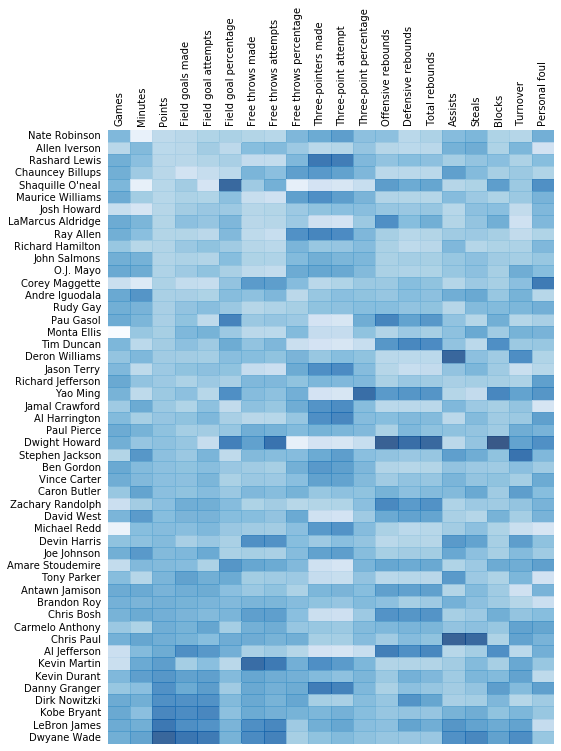

In [79]:
# Plot it out
fig, ax = plt.subplots()
heatmap = ax.pcolor(nba_sort, cmap=plt.cm.Blues, alpha=0.8)

##################################################
## FORMAT ##
##################################################

fig = plt.gcf()
fig.set_size_inches(8,11)

# turn off the frame
ax.set_frame_on(False)

# put the major ticks at the middle of each cell
ax.set_yticks(np.arange(nba_sort.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(nba_sort.shape[1])+0.5, minor=False)

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()

# Set the labels

# label source:https://en.wikipedia.org/wiki/Basketball_statistics
labels = ['Games','Minutes','Points','Field goals made','Field goal attempts','Field goal percentage','Free throws made','Free throws attempts','Free throws percentage','Three-pointers made','Three-point attempt','Three-point percentage','Offensive rebounds','Defensive rebounds','Total rebounds','Assists','Steals','Blocks','Turnover','Personal foul']

# note I could have used nba_sort.columns but made "labels" instead
ax.set_xticklabels(labels, minor=False) 
ax.set_yticklabels(nba_sort.index, minor=False)

# rotate the 
plt.xticks(rotation=90)

ax.grid(False)

# Turn off all the ticks
ax = plt.gca()

for t in ax.xaxis.get_major_ticks(): 
    t.tick1On = False 
    t.tick2On = False 
for t in ax.yaxis.get_major_ticks(): 
    t.tick1On = False 
    t.tick2On = False 